# Utilization Rates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import gc

In [2]:
print("="*80)
print("Utilization Rates")
print("-"*80)

Utilization Rates
--------------------------------------------------------------------------------


In [3]:
# ensure figures dir exists
os.makedirs('figures', exist_ok=True)

## Read Traces

In [4]:
# Get trace data dir from CURRENT_DIR/../data.env
with open( '../data.env') as f:
    for line in f:
        if line.startswith('TRACE_DATA_DIR'):
            TRACE_DATA_DIR = line.split('=')[1].strip()
            break
TRACES_PATH = os.path.join(TRACE_DATA_DIR, 'public_request_tables')

In [5]:
TRACES_PATH = os.path.join(TRACES_PATH, 'huawei_25_traces_public_request_tables.pkl')

In [6]:
data = pd.read_pickle(TRACES_PATH)

In [7]:
data = data[data["cpu_time"] != 0.0]

In [8]:
data.shape

(558735833, 9)

## Plotting

Figure saved to billing/figures/utilization_rates.pdf


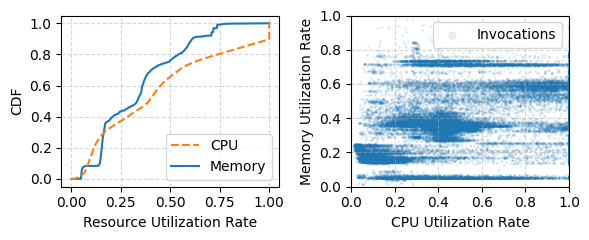

In [9]:
cpu = data['relative_cpu_usage'].dropna().values
mem = data['relative_memory_usage'].dropna().values

# sampling quantiles
qs = np.linspace(0, 1, 1000)  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2.5))

for arr, label in [(cpu, 'CPU'), (mem, 'Memory')]:
    clean = arr[np.isfinite(arr)]
    s = np.quantile(clean, qs)
    if label == 'CPU':
        ax1.plot(s, qs, label=label, linestyle='--', color='tab:orange', zorder=100)
    else:
        ax1.plot(s, qs, label=label, linestyle='-', color='tab:blue')
# ax1.set_xlim(0, 1)
ax1.set_xlabel('Resource Utilization Rate')
ax1.set_ylabel('CDF')
ax1.legend(loc='lower right',
        #    bbox_to_anchor=(1, 0.98),
           markerscale=2)
ax1.grid(alpha=0.5, linestyle='--')

np.random.seed(4)
sample_idx = np.random.choice(len(cpu),
                              size=min(50000, len(cpu)),
                              replace=False)
ax2.scatter(cpu[sample_idx],
            mem[sample_idx],
            s=1, alpha=0.1,
            label='Invocations',
            rasterized=True)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_xlabel('CPU Utilization Rate')
ax2.set_ylabel('Memory Utilization Rate')
ax2.legend(loc='upper right',
           markerscale=5)
ax2.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
fig.savefig('figures/utilization_rates.pdf')
print("Figure saved to billing/figures/utilization_rates.pdf")
plt.show()

In [10]:
# cpu_percentile = np.abs(np.percentile(cpu, np.arange(101)) - 0.5).argmin()
# mem_percentile = np.abs(np.percentile(mem, np.arange(101)) - 0.5).argmin()
# print(f"Around {cpu_percentile}% of requests use less than 50% of the allocated CPU.")
# print(f"Around {mem_percentile}% of requests use less than 50% of the allocated memory.")

In [11]:
print("p65.6 CPU utilization rate is ", np.percentile(cpu, 65.6))
print("More than 65% of requests use less than 50% of the allocated CPU.")
print("p76 memory utilization rate is ", np.percentile(mem, 76))
print("Around 76% of requests use less than 50% of the allocated memory.")

p65.6 CPU utilization rate is  0.49950999999999995
More than 65% of requests use less than 50% of the allocated CPU.
p76 memory utilization rate is  0.499313359375
Around 76% of requests use less than 50% of the allocated memory.


In [12]:
gc.collect()

cpu = data['relative_cpu_usage'].dropna()
mem = data['relative_memory_usage'].dropna()
common_idx = cpu.index.intersection(mem.index)
cpu = cpu.loc[common_idx]
mem = mem.loc[common_idx]

del common_idx
del data
gc.collect()


pearson_corr, pearson_p = stats.pearsonr(cpu, mem)
print(f"The CPU and memory utilization rates show a Pearson correlation of {pearson_corr:.3f}.")
spearman_corr, spearman_p = stats.spearmanr(cpu, mem)
print(f"The CPU and memory utilization rates show a Spearman correlation of {spearman_corr:.3f}.")


The CPU and memory utilization rates show a Pearson correlation of 0.552.
The CPU and memory utilization rates show a Spearman correlation of 0.565.
